# Importing Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


# Data Exploration 

In [2]:
data = pd.read_csv('data/Automobile_data.csv')

In [3]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
data.describe()


,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [7]:
data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [9]:
type(data.price)

pandas.core.series.Series

In [18]:
type(data.price[0])

str

# Visualisation 

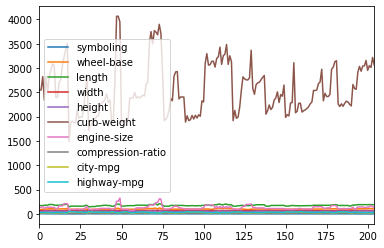

In [13]:
data.plot()

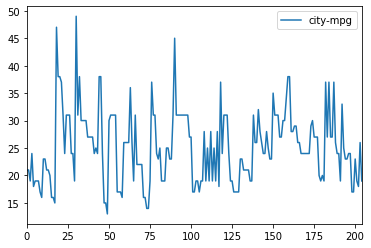

In [16]:
data[['price', 'city-mpg']].plot()

In [19]:
import numpy as np

In [20]:
np.nan

nan

In [44]:
for inx, valu in enumerate(data.price):
    if valu == '?':
#         print(inx, valu)
#         data.price[valu] = np.nan
        
        print(inx,valu)

44 ?
45 ?
129 ?


In [45]:
# data.price[9] = np.nan
data.price[44] = np.nan
data.price[45]= np.nan
data.price[129]= np.nan

In [46]:
data.price.isnull().sum()

5

In [53]:
data.price.isna().sum()

5

In [55]:
data = data.replace(to_replace='?', value=np.nan)

In [57]:
data.dropna(inplace=True)

In [58]:
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [59]:
data = data[['symboling', 'wheel-base', 'length', 'width', 'price']]

In [63]:
type(data.price[4])

str

In [64]:
data['new_price'] = pd.to_numeric(data.price)

In [65]:
data.head()

,symboling,wheel-base,length,width,price,new_price
3,2,99.8,176.6,66.2,13950,13950
4,2,99.4,176.6,66.4,17450,17450
6,1,105.8,192.7,71.4,17710,17710
8,1,105.8,192.7,71.4,23875,23875
10,2,101.2,176.8,64.8,16430,16430


<BarContainer object of 159 artists>

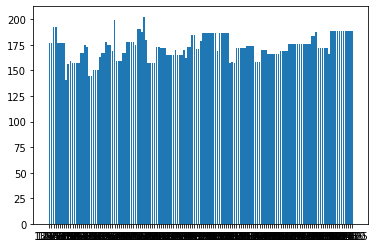

In [75]:
plt.bar(data.price, data.length)

<Figure size 1440x720 with 0 Axes>

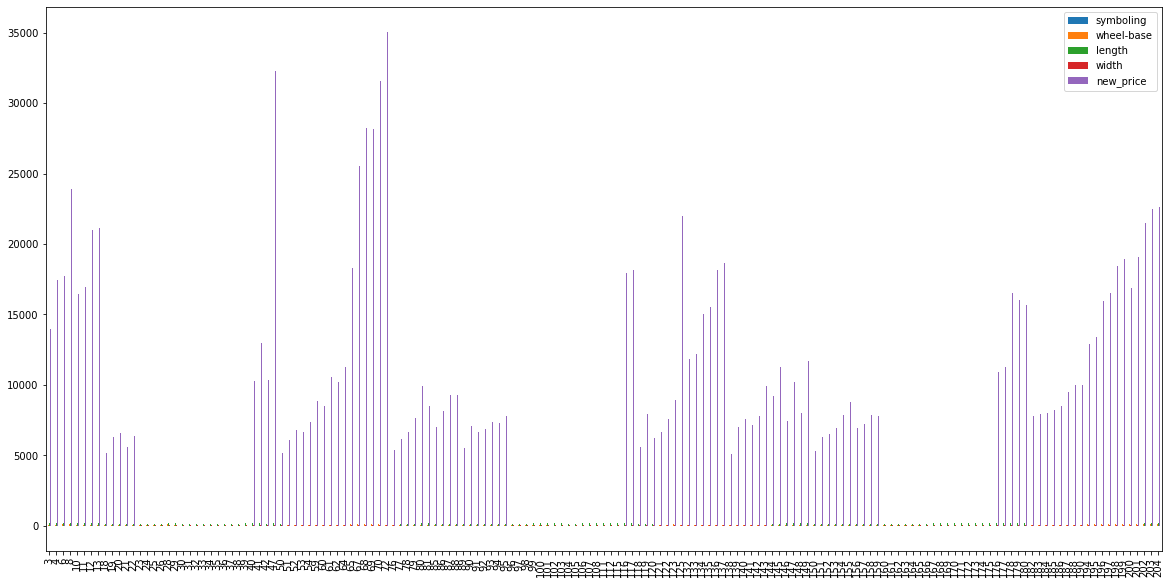

In [73]:
data.plot(kind='bar', figsize=(20,10))
plt.show()

In [76]:
from sklearn.metrics import mean_absolute_error

In [78]:
X = data.drop(['price', 'new_price'], axis=1)

In [87]:
X.head()

,symboling,wheel-base,length,width
3,2,99.8,176.6,66.2
4,2,99.4,176.6,66.4
6,1,105.8,192.7,71.4
8,1,105.8,192.7,71.4
10,2,101.2,176.8,64.8


In [79]:
y = data['new_price']

In [89]:
y.head()

3     13950
4     17450
6     17710
8     23875
10    16430
Name: new_price, dtype: int64

# Modeling

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.5)

In [86]:
lin = LinearRegression()

In [90]:
lin.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [92]:
lin.predict([[0,0,0,0]])

array([-131800.44762753])

In [93]:
predict = lin.predict(X_test)

In [94]:
mean_absolute_error(predict, y_test)

2542.7785033932896